In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def logpdf_GAU_ND(X, mu, C):
    """
    Compute the log-density of a multivariate Gaussian distribution for multiple samples.

    Parameters:
    X : numpy.ndarray of shape (M, N)
        The data matrix (M features, N samples).
    mu : numpy.ndarray of shape (M, 1)
        The mean vector.
    C : numpy.ndarray of shape (M, M)
        The covariance matrix.

    Returns:
    numpy.ndarray
        The array of log-density values (N,).
    """
    M = X.shape[0]
    XC = X - mu
    invC = np.linalg.inv(C)
    log_det_C = np.linalg.slogdet(C)[1]
    term1 = -0.5 * M * np.log(2 * np.pi)
    term2 = -0.5 * log_det_C
    term3 = -0.5 * np.sum(XC * (invC @ XC), axis=0)
    return term1 + term2 + term3

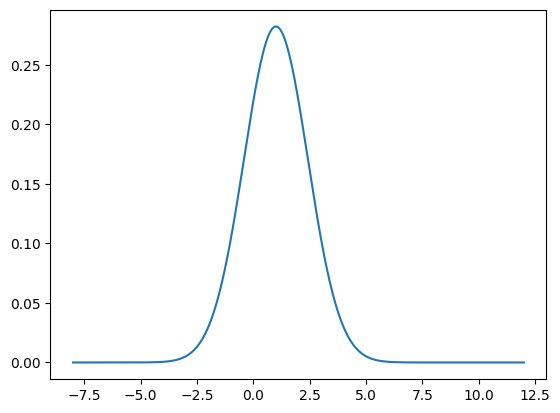

In [10]:
def vrow(x):
	return x.reshape((1, x.size))

plt.figure()
XPlot = np.linspace(-8, 12, 1000)
m = np.ones((1,1)) * 1.0
C = np.ones((1,1)) * 2.0
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(vrow(XPlot), m, C)))
plt.show()


In [12]:
XND = np.load('Solution/XND.npy')
mu = np.load('Solution/muND.npy')
C = np.load('Solution/CND.npy')
pdfSol = np.load('Solution/llND.npy')
pdfGau = logpdf_GAU_ND(XND, mu, C)
print(np.abs(pdfSol - pdfGau).max())


0.0


In [21]:
muML = XND.mean(axis=1, keepdims=True)
Xc = XND - muML
C = (1 / XND.shape[1]) * (Xc @ Xc.T)

In [23]:
muML

array([[-0.07187197],
       [ 0.05979594]])

In [24]:
C

array([[0.94590166, 0.09313534],
       [0.09313534, 0.8229693 ]])

In [29]:
def loglikelihood(XND,m_ML,C_ML):
    logN=logpdf_GAU_ND(XND, m_ML, C_ML)
    return np.sum(logN)
ll = loglikelihood(XND, muML, C)
print(ll)


-270.70478023795044


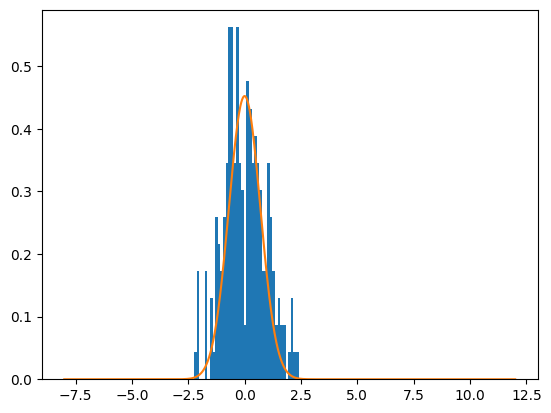

In [31]:
plt.figure()
plt.hist(XND.ravel(), bins=40, density=True)
XPlot = np.linspace(-8, 12, 1000)
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(vrow(XPlot), muML, C)))
